## <font color='darkblue'>Preface</font>
([article source](https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/)) <font size='3ptx'>**Keras is an easy to use and powerful Python library for deep learning.**</font>

**There are a lot of decisions to make when designing and configuring your deep learning models.** Most of these decisions must be resolved empirically through trial and error and evaluating them on real data.

**As such, it is critically important to have a robust way to evaluate the performance of your neural networks and deep learning models. In this post you will discover a few ways that you can use to evaluate model performance using Keras.**

### <font color='darkgreen'>Agenda</font>
* <font size='3ptx'>[**Empirically Evaluate Network Configurations**](#sect1)</font>
* <font size='3ptx'>[**Data Splitting**](#sect2)</font>
* <font size='3ptx'>[**Manual k-Fold Cross Validation**](#sect3)</font>

In [25]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot as plt

# fix random seed for reproducibility
seed = 7

# fix random seed for reproducibility
np.random.seed(seed)

### <font color='darkgreen'>Data Set</font>
All examples in this post use the [Pima Indians onset of diabetes dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes). You can [download it](https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data) from the UCI Machine Learning Repository and save the data file in your current working directory with the filename <font color='olive'>pima-indians-diabetes.csv</font> ([update: download from here](https://www.kaggle.com/uciml/pima-indians-diabetes-database)).

In [6]:
pima_df = pd.read_csv("../../datas/kaggle_pima-indians-diabetes-database/diabetes.csv")
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# split into input (X) and output (Y) variables
X = pima_df.iloc[:,:-1].values
y = pima_df.iloc[:,-1].values

<a id='sect1'></a>
## <font color='darkblue'>Empirically Evaluate Network Configurations</font>
**There are a myriad of decisions you must make when designing and configuring your deep learning models.**

Many of these decisions can be resolved by copying the structure of other people’s networks and using heuristics. Ultimately, the best technique is to actually design small experiments and empirically evaluate options using real data.

This includes high-level decisions like the number, size and type of layers in your network. It also includes the lower level decisions like the choice of loss function, activation functions,  optimization procedure and [number of epochs](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/).

Deep learning is often used on problems that have very large datasets. That is tens of thousands or hundreds of thousands of instances.

As such, **you need to have a robust test harness that allows you to estimate the performance of a given configuration on unseen data, and reliably compare the performance to other configurations.**

<a id='sect2'></a>
## <font color='darkblue'>Data Splitting</font>
**The large amount of data and the complexity of the models require very long training times.**

As such, it is typically to use a simple separation of data into training and test datasets or training and validation datasets. Keras provides a two convenient ways of evaluating your deep learning algorithms this way:
* [**Use an automatic verification dataset.**](#sect2_1)
* [**Use a manual verification dataset.**](#sect2_2)

<a id='sect2_1'></a>
### <font color='darkgreen'>Use a Automatic Verification Dataset</font>
**Keras can separate a portion of your training data into a validation dataset and evaluate the performance of your model on that validation dataset each epoch.**

You can do this by setting the <font color='violet'>validation_split</font> argument on the <font color='blue'>fit()</font> function to a percentage of the size of your training dataset. For example, a reasonable value might be 0.2 or 0.33 for 20% or 33% of your training data held back for validation.

The example below demonstrates the use of using an automatic validation dataset on a small binary classification problem.

In [13]:
def get_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [16]:
# create model
model = get_model()

# Fit the model
history = model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
52/52 [==============================] - 0s 3ms/step - loss: 18.9152 - accuracy: 0.3605 - val_loss: 7.5055 - val_accuracy: 0.4921
Epoch 2/150
52/52 [==============================] - 0s 1ms/step - loss: 5.0327 - accuracy: 0.5364 - val_loss: 1.7996 - val_accuracy: 0.6535
Epoch 3/150
52/52 [==============================] - 0s 1ms/step - loss: 1.7254 - accuracy: 0.6657 - val_loss: 1.4343 - val_accuracy: 0.5984
Epoch 4/150
52/52 [==============================] - 0s 1ms/step - loss: 1.3628 - accuracy: 0.6790 - val_loss: 1.2649 - val_accuracy: 0.6220
Epoch 5/150
52/52 [==============================] - 0s 972us/step - loss: 1.0699 - accuracy: 0.6923 - val_loss: 1.1931 - val_accuracy: 0.6457
Epoch 6/150
52/52 [==============================] - 0s 987us/step - loss: 1.0621 - accuracy: 0.6967 - val_loss: 1.0318 - val_accuracy: 0.6378
Epoch 7/150
52/52 [==============================] - 0s 1ms/step - loss: 0.9721 - accuracy: 0.6704 - val_loss: 0.9163 - val_accuracy: 0.6299
Epoch 8/

52/52 [==============================] - 0s 982us/step - loss: 0.5498 - accuracy: 0.7122 - val_loss: 0.5675 - val_accuracy: 0.7402
Epoch 59/150
52/52 [==============================] - 0s 995us/step - loss: 0.5590 - accuracy: 0.7104 - val_loss: 0.5670 - val_accuracy: 0.7087
Epoch 60/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5406 - accuracy: 0.7065 - val_loss: 0.5920 - val_accuracy: 0.6890
Epoch 61/150
52/52 [==============================] - 0s 999us/step - loss: 0.5826 - accuracy: 0.6772 - val_loss: 0.5677 - val_accuracy: 0.7283
Epoch 62/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5440 - accuracy: 0.7091 - val_loss: 0.5611 - val_accuracy: 0.7402
Epoch 63/150
52/52 [==============================] - 0s 999us/step - loss: 0.5571 - accuracy: 0.6901 - val_loss: 0.5879 - val_accuracy: 0.7008
Epoch 64/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5514 - accuracy: 0.7140 - val_loss: 0.5772 - val_accuracy: 0.7441
Epoch 65/15

52/52 [==============================] - 0s 981us/step - loss: 0.5695 - accuracy: 0.6678 - val_loss: 0.5384 - val_accuracy: 0.7402
Epoch 116/150
52/52 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.7422 - val_loss: 0.5531 - val_accuracy: 0.7480
Epoch 117/150
52/52 [==============================] - 0s 966us/step - loss: 0.5128 - accuracy: 0.7126 - val_loss: 0.5440 - val_accuracy: 0.7402
Epoch 118/150
52/52 [==============================] - 0s 961us/step - loss: 0.5635 - accuracy: 0.6885 - val_loss: 0.5333 - val_accuracy: 0.7520
Epoch 119/150
52/52 [==============================] - 0s 945us/step - loss: 0.5053 - accuracy: 0.7274 - val_loss: 0.5720 - val_accuracy: 0.7362
Epoch 120/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5453 - accuracy: 0.6960 - val_loss: 0.5321 - val_accuracy: 0.7598
Epoch 121/150
52/52 [==============================] - 0s 988us/step - loss: 0.5905 - accuracy: 0.6828 - val_loss: 0.5371 - val_accuracy: 0.7520
Epo

Running the example, you can see that the verbose output on each epoch shows the loss and accuracy on both the training dataset and the validation dataset.

<a id='sect2_2'></a>
### <font color='darkgreen'>Use a Manual Verification Dataset</font>
**Keras also allows you to manually specify the dataset to use for validation during training.**

In this example we use the handy [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from the Python scikit-learn machine learning library to separate our data into a training and test dataset. We use 67% for training and the remaining 33% of the data for validation.

The validation dataset can be specified to the <font color='blue'>fit()</font> function in Keras by the <font color='violet'>validation_data</font> argument. It takes a tuple of the input and output datasets.

In [21]:
# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

# create model
model = get_model()

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10)

Epoch 1/150
52/52 [==============================] - 0s 3ms/step - loss: 4.9019 - accuracy: 0.6612 - val_loss: 1.6766 - val_accuracy: 0.5630
Epoch 2/150
52/52 [==============================] - 0s 1ms/step - loss: 1.2200 - accuracy: 0.6519 - val_loss: 1.2403 - val_accuracy: 0.5945
Epoch 3/150
52/52 [==============================] - 0s 1ms/step - loss: 1.0933 - accuracy: 0.6060 - val_loss: 1.0395 - val_accuracy: 0.5827
Epoch 4/150
52/52 [==============================] - 0s 1ms/step - loss: 0.9907 - accuracy: 0.5811 - val_loss: 0.9501 - val_accuracy: 0.6693
Epoch 5/150
52/52 [==============================] - 0s 1ms/step - loss: 0.8971 - accuracy: 0.6181 - val_loss: 0.8985 - val_accuracy: 0.6772
Epoch 6/150
52/52 [==============================] - 0s 1ms/step - loss: 0.7916 - accuracy: 0.6405 - val_loss: 0.8396 - val_accuracy: 0.6732
Epoch 7/150
52/52 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.7202 - val_loss: 0.7964 - val_accuracy: 0.6339
Epoch 8/150
5

52/52 [==============================] - 0s 967us/step - loss: 0.5567 - accuracy: 0.7019 - val_loss: 0.6077 - val_accuracy: 0.6969
Epoch 59/150
52/52 [==============================] - 0s 993us/step - loss: 0.5400 - accuracy: 0.7476 - val_loss: 0.5736 - val_accuracy: 0.6850
Epoch 60/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.7434 - val_loss: 0.5659 - val_accuracy: 0.6929
Epoch 61/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5520 - accuracy: 0.6849 - val_loss: 0.5662 - val_accuracy: 0.6969
Epoch 62/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5349 - accuracy: 0.7231 - val_loss: 0.5701 - val_accuracy: 0.7047
Epoch 63/150
52/52 [==============================] - 0s 1ms/step - loss: 0.4949 - accuracy: 0.7584 - val_loss: 0.5611 - val_accuracy: 0.6969
Epoch 64/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5723 - accuracy: 0.6852 - val_loss: 0.5634 - val_accuracy: 0.7047
Epoch 65/150
52

52/52 [==============================] - 0s 1ms/step - loss: 0.5172 - accuracy: 0.7330 - val_loss: 0.5624 - val_accuracy: 0.7126
Epoch 116/150
52/52 [==============================] - 0s 987us/step - loss: 0.5284 - accuracy: 0.7317 - val_loss: 0.5412 - val_accuracy: 0.7047
Epoch 117/150
52/52 [==============================] - 0s 1ms/step - loss: 0.4833 - accuracy: 0.7848 - val_loss: 0.5728 - val_accuracy: 0.7283
Epoch 118/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5356 - accuracy: 0.7296 - val_loss: 0.5428 - val_accuracy: 0.7205
Epoch 119/150
52/52 [==============================] - 0s 987us/step - loss: 0.4858 - accuracy: 0.7589 - val_loss: 0.6472 - val_accuracy: 0.6969
Epoch 120/150
52/52 [==============================] - 0s 997us/step - loss: 0.5861 - accuracy: 0.7313 - val_loss: 0.5434 - val_accuracy: 0.7008
Epoch 121/150
52/52 [==============================] - 0s 978us/step - loss: 0.5009 - accuracy: 0.7473 - val_loss: 0.5416 - val_accuracy: 0.7205
Epoch

<a id='sect3'></a>
## <font color='darkblue'>Manual k-Fold Cross Validation</font>
**The gold standard for machine learning model evaluation is - [k-fold cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)).**

It provides a robust estimate of the performance of a model on unseen data. It does this by splitting the training dataset into `K` subsets and takes turns training models on all subsets except one which is held out, and evaluating model performance on the held out validation dataset. The process is repeated until all subsets are given an opportunity to be the held out validation set. The performance measure is then averaged across all models that are created.

**Cross validation is often not used for evaluating deep learning models because of the greater computational expense.** For example k-fold cross validation is often used with 5 or 10 folds. As such, 5 or 10 models must be constructed and evaluated, greatly adding to the evaluation time of a model.

Nevertheless, it when the problem is small enough or if you have sufficient compute resources, k-fold cross validation can give you a less biased estimate of the performance of your model.

In the example below we use the handy [**StratifiedKFold class**](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedKFold.html) from the scikit-learn Python machine learning library to split up the training dataset into 10 folds. The folds are stratified, meaning that **the algorithm attempts to balance the number of instances of each class in each fold**.

The example creates and evaluates 10 models using the 10 splits of the data and collects all of the scores. The verbose output for each epoch is turned off by passing <font color='violet'>verbose=0</font> to the <font color='blue'>fit()</font> and <font color='blue'>evaluate()</font> functions on the model.

The performance is printed for each model and it is stored. The average and standard deviation of the model performance is then printed at the end of the run to provide a robust estimate of model accuracy.

In [24]:
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X, y):
    # create model
    model = get_model()
        
    # Fit the model
    model.fit(X[train], y[train], epochs=150, batch_size=10, verbose=0)

    # evaluate the model
    scores = model.evaluate(X[test], y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 71.43%
accuracy: 74.03%
accuracy: 76.62%
accuracy: 77.92%
accuracy: 71.43%
accuracy: 70.13%
accuracy: 70.13%
accuracy: 76.62%
accuracy: 76.32%
accuracy: 81.58%
74.62% (+/- 3.62%)


Running the example will take less than a minute and will produce the above output.

## <font color='darkblue'>Train/Validation Performance</font>
If you are interested how train/validation accuracy history during training, you can draw a chart of them as below:

In [26]:
# create model
model = get_model()

# Fit the model
history = model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

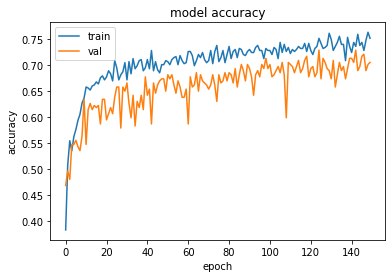

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

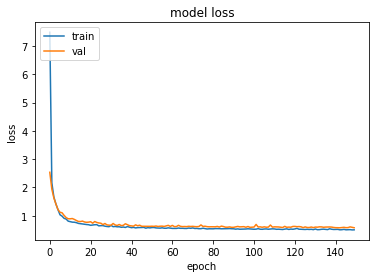

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## <font color='darkblue'>Summary</font>
In this post you discovered the importance of having a robust way to estimate the performance of your deep learning models on unseen data. You discovered three ways that you can estimate the performance of your deep learning models in Python using the Keras library:
* Use Automatic Verification Datasets.
* Use Manual Verification Datasets.
* Use Manual k-Fold Cross Validation.

## <font color='darkblue'>Supplement</font>
* [Kaggle - Pima Indians Diabetes EDA](https://www.kaggle.com/michaelchen1116/pima-indians-diabetes-eda)